In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as ply

In [2]:

data=pd.read_csv(r"C:\data\titanic_d.csv")
data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
print(data.shape)
print(data.describe())

(891, 12)
       PassengerId      Pclass         Age       SibSp       Parch  \
count   891.000000  891.000000  714.000000  891.000000  891.000000   
mean    446.000000    2.308642   29.699118    0.523008    0.381594   
std     257.353842    0.836071   14.526497    1.102743    0.806057   
min       1.000000    1.000000    0.420000    0.000000    0.000000   
25%     223.500000    2.000000   20.125000    0.000000    0.000000   
50%     446.000000    3.000000   28.000000    0.000000    0.000000   
75%     668.500000    3.000000   38.000000    1.000000    0.000000   
max     891.000000    3.000000   80.000000    8.000000    6.000000   

             Fare    Survived  
count  891.000000  891.000000  
mean    32.204208    0.383838  
std     49.693429    0.486592  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329200    1.000000  


In [4]:
#checking the null value
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [5]:
#Droping the unnecessary coloum
data.drop(['Name','Ticket','PassengerId','Cabin'],axis=1,inplace=True)
print("coloum sucessfully droped")

coloum sucessfully droped


In [6]:
data.groupby("Pclass")["Age"].mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [7]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38.00
        if Pclass==2:
            return 29.00
        if Pclass==3:
            return 25.00
    else:
        return Age


In [8]:
data["Age"]=data[["Age","Pclass"]].apply(input_age,axis=1)

In [9]:

data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Survived    0
dtype: int64

<AxesSubplot:>

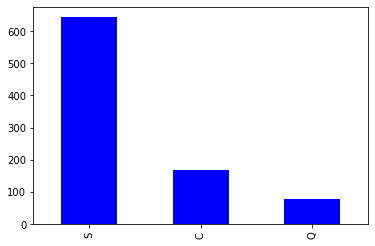

In [10]:
data["Embarked"].value_counts().plot(kind="bar",color="blue")

In [11]:
data["Embarked"].fillna("S",inplace=True)
data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
data["Sex"]= lb.fit_transform(data["Sex"])
data["Embarked"]=lb.fit_transform(data["Embarked"])


In [13]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


In [14]:
data.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.131900,-0.403923,0.083081,0.018443,-0.549500,0.162098,-0.338481
Sex,0.131900,1.000000,0.079949,-0.114631,-0.245489,-0.182333,0.108262,-0.543351
Age,-0.403923,0.079949,1.000000,-0.243110,-0.174824,0.121503,-0.015899,-0.050118
SibSp,0.083081,-0.114631,-0.243110,1.000000,0.414838,0.159651,0.068230,-0.035322
Parch,0.018443,-0.245489,-0.174824,0.414838,1.000000,0.216225,0.039798,0.081629
Fare,-0.549500,-0.182333,0.121503,0.159651,0.216225,1.000000,-0.224719,0.257307
Embarked,0.162098,0.108262,-0.015899,0.068230,0.039798,-0.224719,1.000000,-0.167675
Survived,-0.338481,-0.543351,-0.050118,-0.035322,0.081629,0.257307,-0.167675,1.000000


## using model


In [15]:
coloum=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
x=data[coloum]
y= data["Survived"]


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=54)



In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 7), (268, 7), (623,), (268,))

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

dc=DecisionTreeClassifier(criterion='entropy', random_state=0)
dc.fit(X_train,y_train)
y_pred=dc.predict(X_test)

acc= accuracy_score(y_test,y_pred)
print(f"DC accuracy score:{acc}")


DC accuracy score:0.7686567164179104


In [19]:
from sklearn.naive_bayes import GaussianNB
GB=GaussianNB()
GB.fit(X_train,y_train)
y_pred1=GB.predict(X_test)
acc1= accuracy_score(y_test,y_pred1)
print(f"GB accuracy score : {acc1}")

      

GB accuracy score : 0.7649253731343284
